# PMCW Radar

This is a phase-modulated continuous-wave (PMCW) radar simulation example based on `RadarSimPy`.

>`RadarSimPy` is a radar simulation package built with python. **<a href="https://zpeng.me/#contact" target="_blank">Contact me</a> if you are interested in this module.**

This notebook is available on my <a href="https://github.com/rookiepeng/radar-simulation-notebooks" target="_blank">GitHub</a>.


## Radar Model
### Transmitter

The following table lists the basic parameters of the radar transmitter.

| Parameter                       | Variable in `RadarSimPy` | Value      |
|---------------------------------|--------------------------|------------|
| Center frequency ($f_c$)        | fc                       | 24.125 GHz |
| Bandwidth ($B$)                 | bandwidth                | 0 Hz       |
| Transmitted power ($P_t$)       | tx_power                 | 20 dBm     |
| Pulse repetition period         | repetition_period        | 2.1 us     |
| Pulse length ($T$)              | pulse_length             | 2.1 us     |
| Number of pulses                | pulses                   | 256        |

The transmitted signals are modulated with phase codes. The length of the phase code is 255 with the code rate of 256 Mb/s.

### Receiver
The parameters of the receiver are listed in the table below.

| Parameter                        | Variable in `RadarSimPy` | Value        |
|----------------------------------|--------------------------|--------------|
| Sampling rate ($f_s$)            | fs                       | 250 Msps     |
| Noise figure ($NF$)              | noise_figure             | 10 dB        |
| RF gain/loss ($G_{rf}$)          | rf_gain                  | 20 dB        |
| Load resistor ($R_L$)            | load_resistor            | 1000 $\Omega$|
| Baseband voltage gain ($G_{BB}$) | baseband_gain            | 30 dB        |


In [1]:
import numpy as np
from radarsimpy import Radar, Transmitter, Receiver

angle = np.arange(-90, 91, 1)
pattern = 20 * np.log10(np.cos(angle / 180 * np.pi) + 0.01) + 12

code1 = np.array([1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1,
                  1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1,
                  1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1,
                  -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1,
                  1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1,
                  1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1,
                  1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1,
                  -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1,
                  -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1,
                  1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1,
                  1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1,
                  -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1,
                  -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1,
                  -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1,
                  1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1,
                  1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1])
code2 = np.array([1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1,
                  -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1,
                  -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1,
                  -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1,
                  1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1,
                  -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1,
                  1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1,
                  1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1,
                  -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1,
                  -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1,
                  1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1,
                  1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1,
                  -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1,
                  -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1,
                  1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1,
                  -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1])

phase_code1=np.zeros(np.shape(code1))
phase_code2=np.zeros(np.shape(code2))
phase_code1[np.where(code1 == 1)] = 0
phase_code1[np.where(code1 == -1)] = 180
phase_code2[np.where(code2 == 1)] = 0
phase_code2[np.where(code2 == -1)] = 180

tx_channel_1 = dict(
    location=(0, 0, 0),
    azimuth_angle=angle,
    azimuth_pattern=pattern,
    elevation_angle=angle,
    elevation_pattern=pattern,
    chip_length=4e-9,
    phase_code=phase_code1,
)

tx_channel_2 = dict(
    location=(0, 0, 0),
    azimuth_angle=angle,
    azimuth_pattern=pattern,
    elevation_angle=angle,
    elevation_pattern=pattern,
    chip_length=4e-9,
    phase_code=phase_code2,
    delay=0.01
)

tx = Transmitter(f=24.125e9,
                 tx_power=20,
                 pulses=256,
                 pulse_time=2.1e-6,
                 channels=[tx_channel_1, tx_channel_2])

rx = Receiver(fs=250e6,
              noise_figure=10,
              rf_gain=20,
              baseband_gain=30,
              load_resistor=1000,
              channels=[
                  dict(location=(0, 0, 0),
                       azimuth_angle=angle,
                       azimuth_pattern=pattern,
                       elevation_angle=angle,
                       elevation_pattern=pattern)
              ])

Create the FMCW radar model based on all the parameters defined above.

In [2]:
radar = Radar(transmitter=tx, receiver=rx)

### Targets
The propertities of targets are defined here. There are 3 targets in this simulation. The locations of the targets are defined through $(x, y, z)$ coordinates in meters, and the speeds of the targets are defined trough $(v_x, v_y, v_z)$ in $m/s$. The propertites of the targets also includes radar cross-section (RCS (dBsm)) and phase (radian).

In [3]:
target_1 = dict(location=(20, 0, 0),
                speed=(-200, 0, 0),
                rcs=20,
                phase=0)

target_2 = dict(location=(70, 0, 0),
                speed=(0, 0, 0),
                rcs=35,
                phase=0)

target_3 = dict(location=(33, 10, 0),
                speed=(100, 0, 0),
                rcs=20,
                phase=0)

targets = [target_1, target_2, target_3]

## Simulate Baseband Signals

Calculate baseband signal matrix:
$$[channels, pulses, ADC~samples]$$

#### Simulate with Python engine

In [4]:
from radarsimpy import simulator as sim

data = sim(radar, targets, noise=True)
time_matrix = data['timestamp']
data_matrix = data['baseband']

In [5]:
%timeit sim(radar, targets)

5.97 s ± 469 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Simulate with C++ engine

In [6]:
from radarsimpy import simulatorcpp as simcpp

datacpp = simcpp(radar, targets, noise=True)
time_matrixcpp = datacpp['timestamp']
data_matrixcpp = datacpp['baseband']

In [7]:
%timeit simcpp(radar, targets)

614 ms ± 9.86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


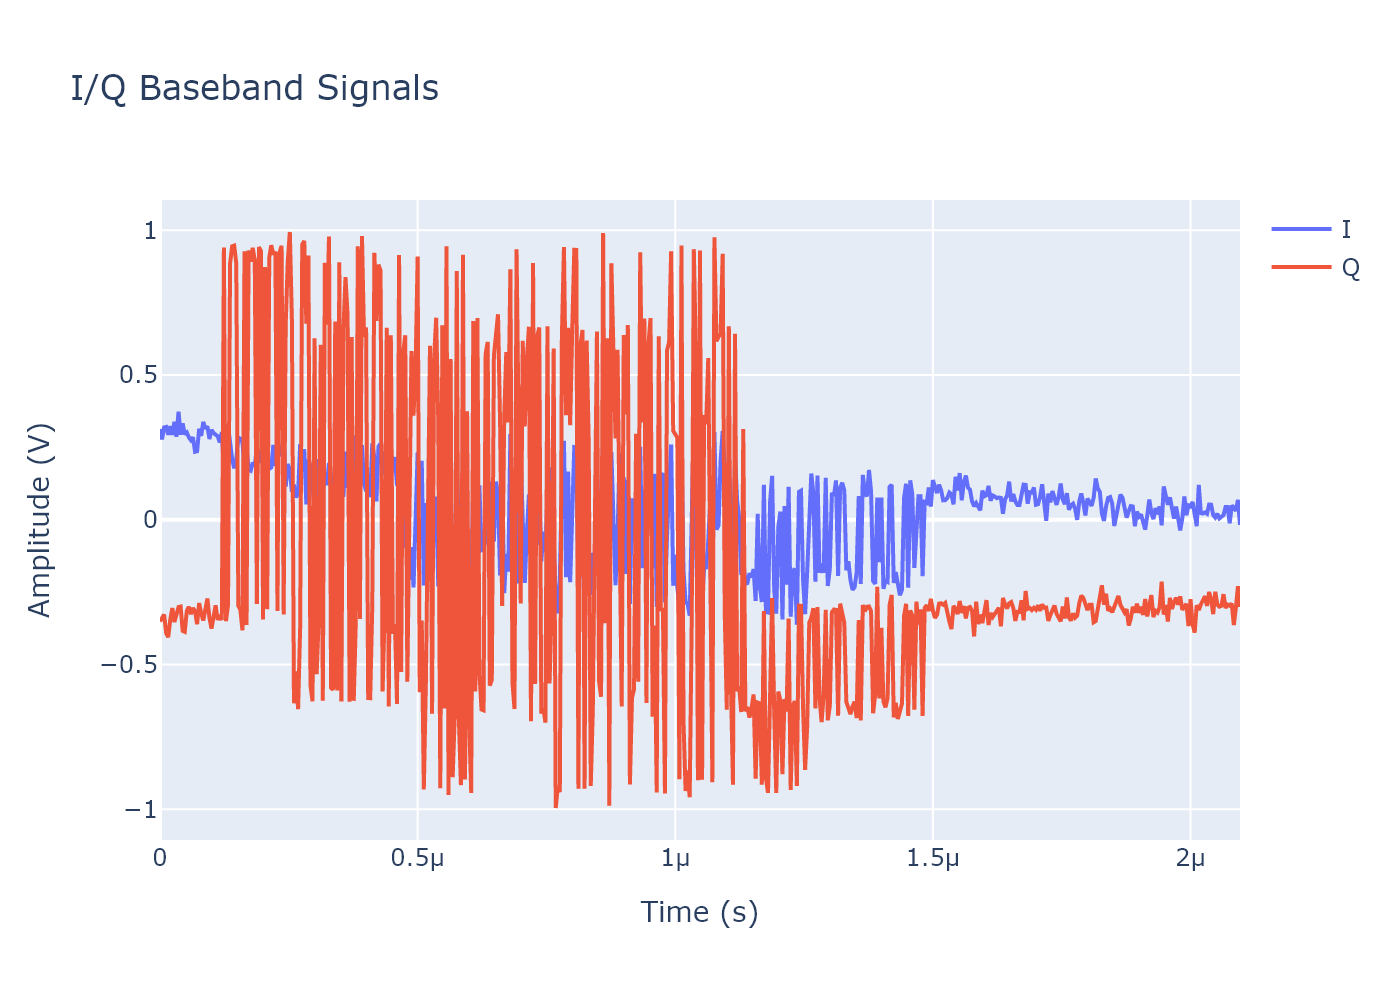

In [8]:
import plotly.graph_objs as go
from plotly.offline import iplot
from IPython.display import Image

beat_I = go.Scatter(
    x=time_matrixcpp[0, 0, :],
    y=np.real(data_matrixcpp[1, 255, :]),
    name='I',
)
beat_Q = go.Scatter(
    x=time_matrixcpp[0, 0, :],
    y=np.imag(data_matrixcpp[1, 255, :]),
    name='Q',
)

data = [beat_I, beat_Q]

layout = go.Layout(
    title='I/Q Baseband Signals',
    yaxis=dict(title='Amplitude (V)'),
    xaxis=dict(title='Time (s)'),
)

fig = go.Figure(data, layout=layout)
# iplot(fig)
Image(fig.to_image(format='png', scale=2), retina=True)

## Radar Signal Processing

In [9]:
code_length = 255
range_profile = np.zeros(
    (radar.channel_size, radar.transmitter.pulses, code_length), dtype=complex)

for pulse_idx in range(0, radar.transmitter.pulses):
    for bin_idx in range(0, code_length):
        range_profile[:, pulse_idx, bin_idx] = np.sum(
            code2*data_matrixcpp[1, pulse_idx, bin_idx:(bin_idx+code_length)])

bin_size = 3e8/2*4e-9
range_bin = np.arange(0, code_length, 1)*bin_size

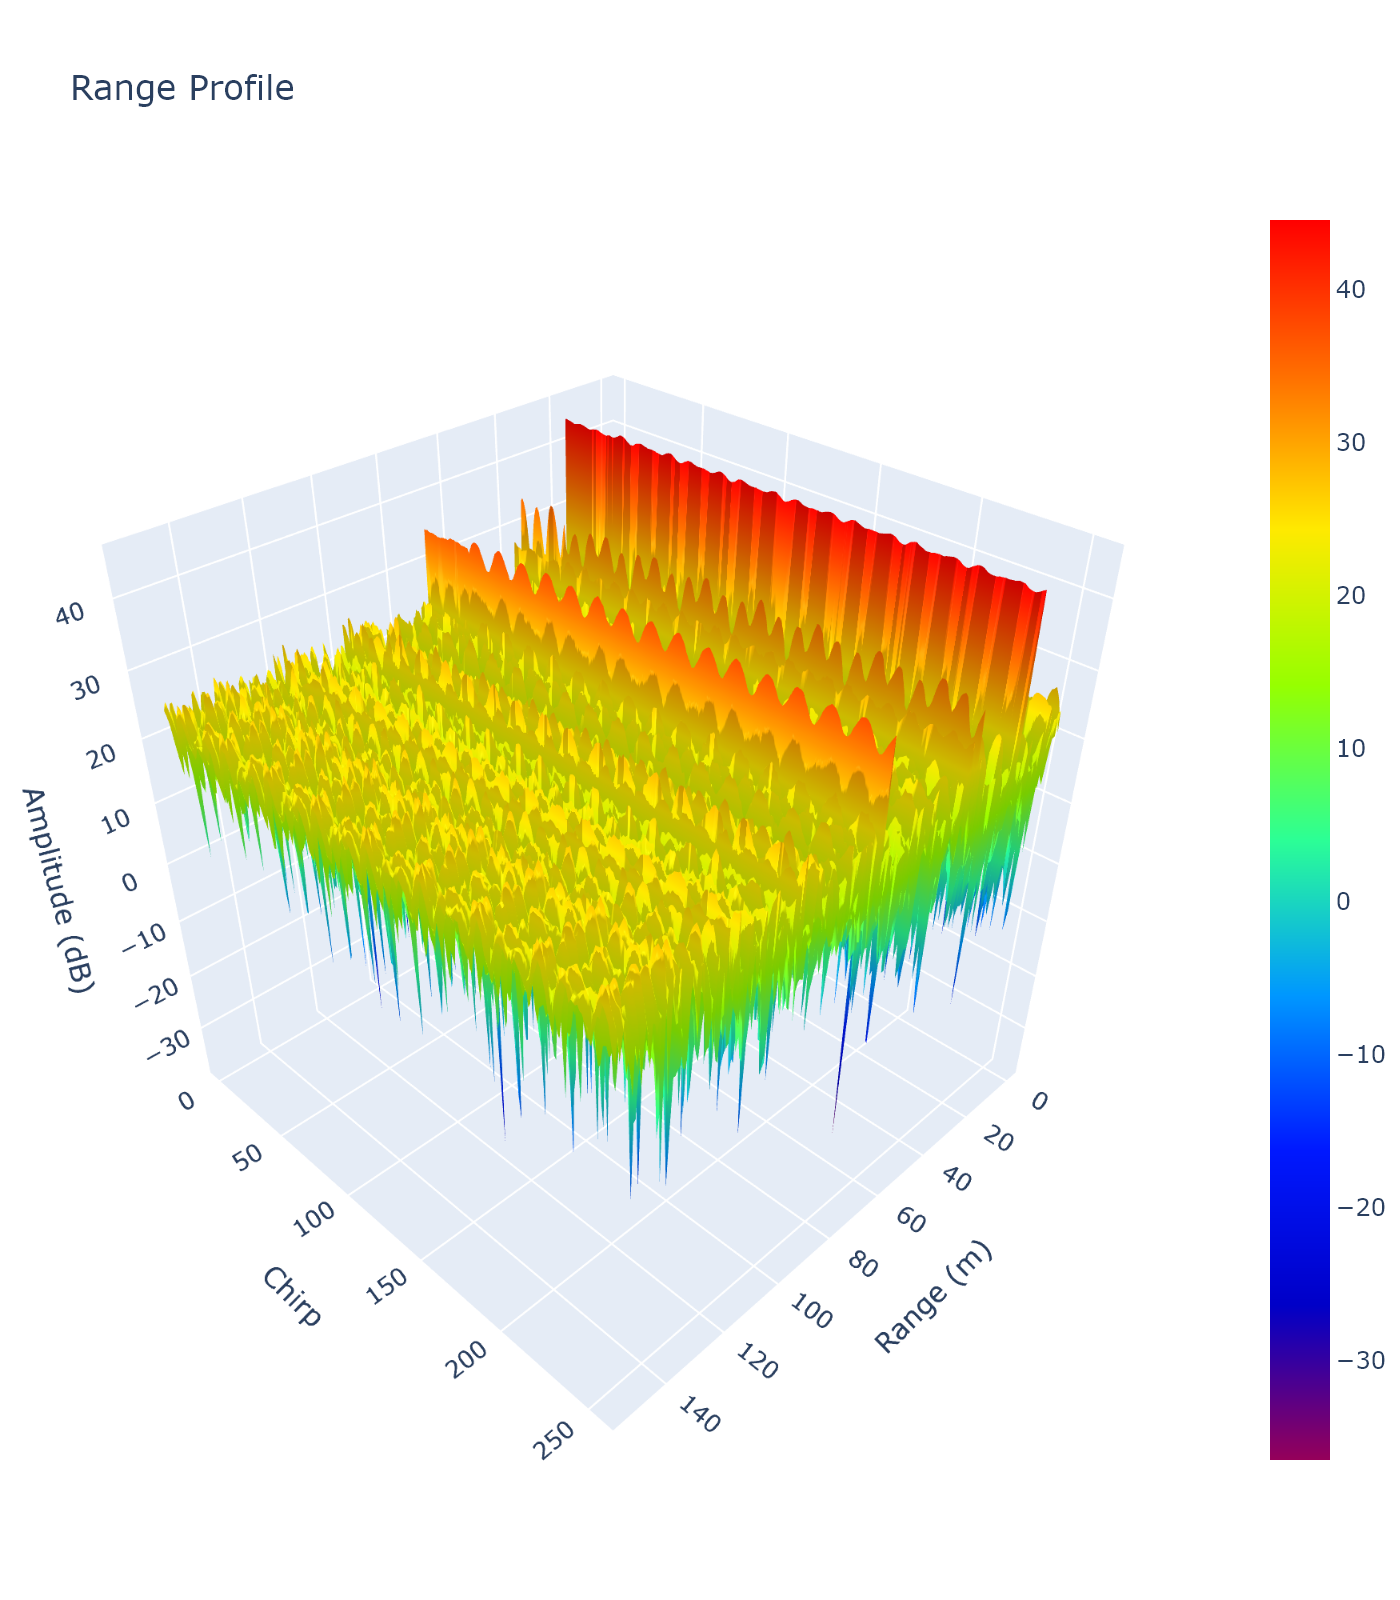

In [10]:
temp = np.abs(range_profile[1, :, :])
temp = 20 * np.log10(temp + 0.001)

range_axis = np.arange(0, code_length, 1)*bin_size

doppler_axis = np.linspace(
    0, radar.transmitter.pulses, radar.transmitter.pulses, endpoint=False)

data = [go.Surface(x=range_axis, y=doppler_axis, z=temp, colorscale='Rainbow')]

camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.4, y=1.4, z=1.4)
)

layout = go.Layout(
    title='Range Profile',
    height=800,
    scene=dict(
        xaxis=dict(title='Range (m)'),
        yaxis=dict(title='Chirp'),
        zaxis=dict(title='Amplitude (dB)'),
        aspectmode='cube',
        camera=camera,
    ),
    margin=dict(l=0, r=0, b=60, t=100),
    legend=dict(orientation='h'),
)

fig = go.Figure(data=data, layout=layout)
# iplot(fig)
Image(fig.to_image(format='png', scale=2), retina=True)

In [12]:
from scipy import signal

doppler_window = signal.chebwin(radar.transmitter.pulses, at=50)

range_doppler = np.zeros(np.shape(range_profile), dtype=complex)
for ii in range(0, radar.channel_size):
    for jj in range(0, code_length):
        range_doppler[ii, :, jj] = np.fft.fftshift(np.fft.fft(
            range_profile[ii, :, jj] * doppler_window,
            n=radar.transmitter.pulses,
        ))
unambiguous_speed = 3e8 / radar.transmitter.repetition_period / radar.transmitter.fc_0 / 2

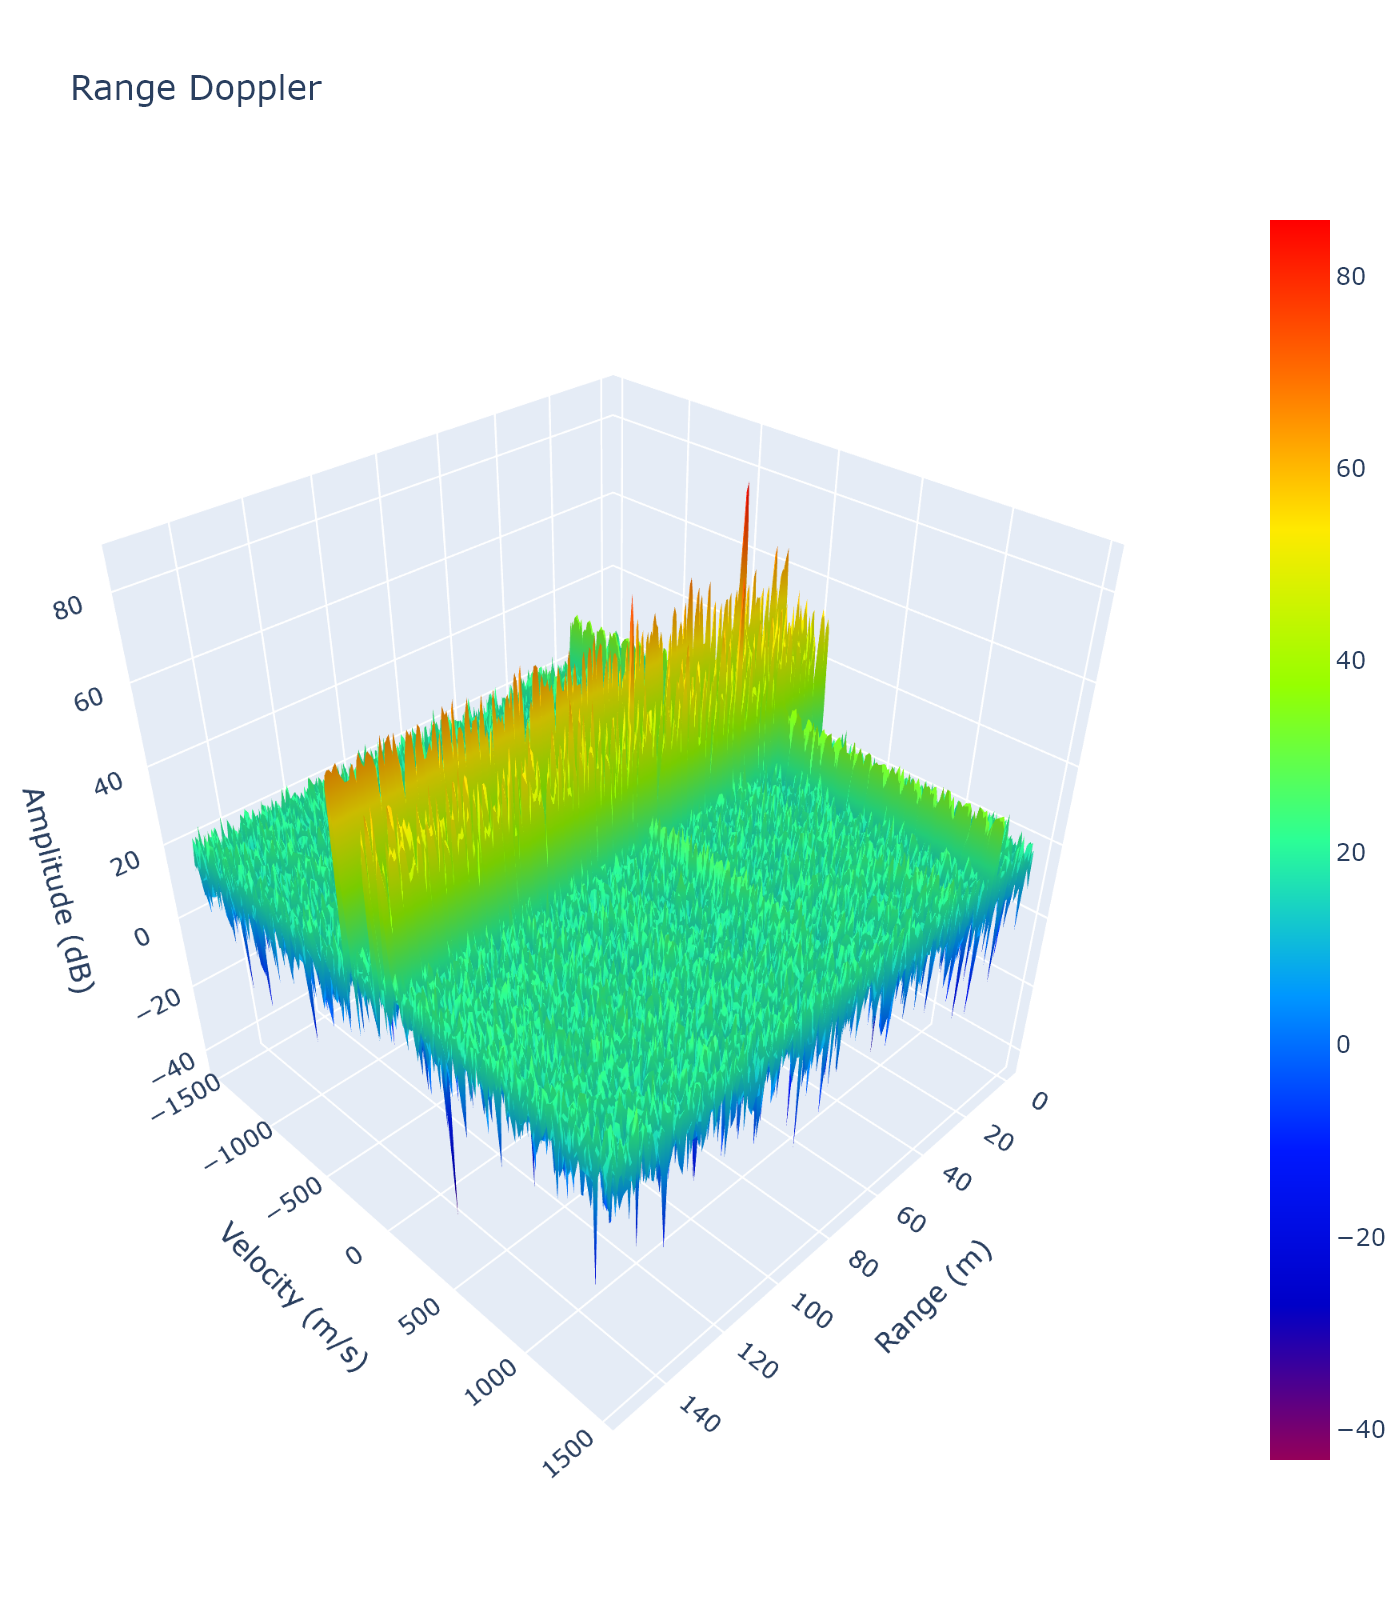

In [13]:
temp = np.abs(range_doppler[1, :, :])
temp = 20 * np.log10(temp)

range_axis = np.arange(0, code_length, 1)*bin_size

doppler_axis = np.linspace(
    -unambiguous_speed/2, unambiguous_speed/2, radar.transmitter.pulses, endpoint=False)

data = [go.Surface(x=range_axis, y=doppler_axis, z=temp, colorscale='Rainbow')]

camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.4, y=1.4, z=1.4)
)

layout = go.Layout(
    title='Range Doppler',
    height=800,
    scene=dict(
        xaxis=dict(title='Range (m)'),
        yaxis=dict(title='Velocity (m/s)'),
        zaxis=dict(title='Amplitude (dB)'),
        aspectmode='cube',
        camera=camera,
    ),
    margin=dict(l=0, r=0, b=60, t=100),
    legend=dict(orientation='h'),
)

fig = go.Figure(data=data, layout=layout)
# iplot(fig)
Image(fig.to_image(format='png', scale=2), retina=True)